### Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

#### Concept
- **Random Forest for Classification**: Combines multiple decision trees to improve the model's accuracy and control over-fitting.
- **Random Forest for Regression**: Uses the mean of the predictions from multiple decision trees to predict continuous values.

#### Parameters
##### `n_estimators`
- **Meaning**: The number of decision trees in the Random Forest.
- **Impact**: More trees can improve the model's performance but also increase computational cost. Generally, more trees lead to better performance up to a point of diminishing returns.

##### `max_depth`
- **Meaning**: The maximum depth of each decision tree.
- **Impact**: Deeper trees can model more complex patterns but are more likely to overfit. Shallow trees may underfit the data.


### Random Forest Classification

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])



Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [4]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.0,108,63,0,0,1.000000,0.631579,0.774194
1,0.1,108,13,50,0,1.000000,0.892562,0.943231
2,0.2,108,9,54,0,1.000000,0.923077,0.960000
3,0.3,107,6,57,1,0.990741,0.946903,0.968326
4,0.4,107,5,58,1,0.990741,0.955357,0.972727
5,0.5,107,4,59,1,0.990741,0.963964,0.977169
6,0.6,106,2,61,2,0.981481,0.981481,0.981481
7,0.7,102,1,62,6,0.944444,0.990291,0.966825
8,0.8,96,0,63,12,0.888889,1.000000,0.941176
9,0.9,86,0,63,22,0.796296,1.000000,0.886598


Feature importances:
mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1183
mean concavity: 0.0799
worst radius: 0.0780
worst perimeter: 0.0743
mean perimeter: 0.0601
mean area: 0.0535
worst concavity: 0.0411
mean radius: 0.0323
area error: 0.0294
worst texture: 0.0190
worst compactness: 0.0181
radius error: 0.0164
worst symmetry: 0.0129
worst smoothness: 0.0120
perimeter error: 0.0118
mean texture: 0.0111
mean compactness: 0.0090
fractal dimension error: 0.0071
worst fractal dimension: 0.0069
mean smoothness: 0.0062
concavity error: 0.0061
smoothness error: 0.0060
compactness error: 0.0046
symmetry error: 0.0038
concave points error: 0.0033
mean symmetry: 0.0033
texture error: 0.0032
mean fractal dimension: 0.0032


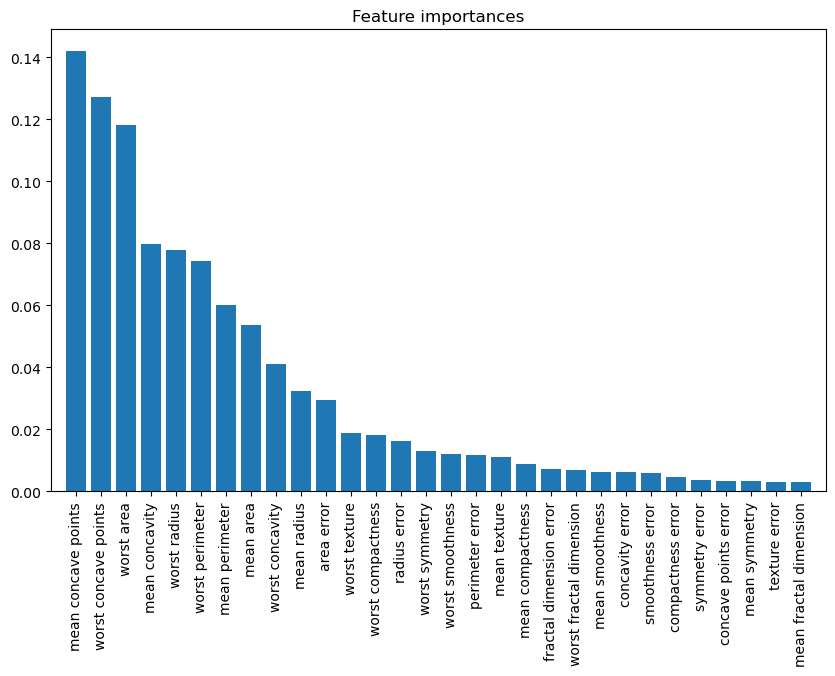

In [6]:
# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_metrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = breast_cancer.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Random Forest Regression

Mean Squared Error: 0.4628
R-Squared: 0.6468
Feature importances:
MedInc: 0.7534
AveOccup: 0.1418
HouseAge: 0.0407
Latitude: 0.0250
AveRooms: 0.0195
Longitude: 0.0153
Population: 0.0033
AveBedrms: 0.0011


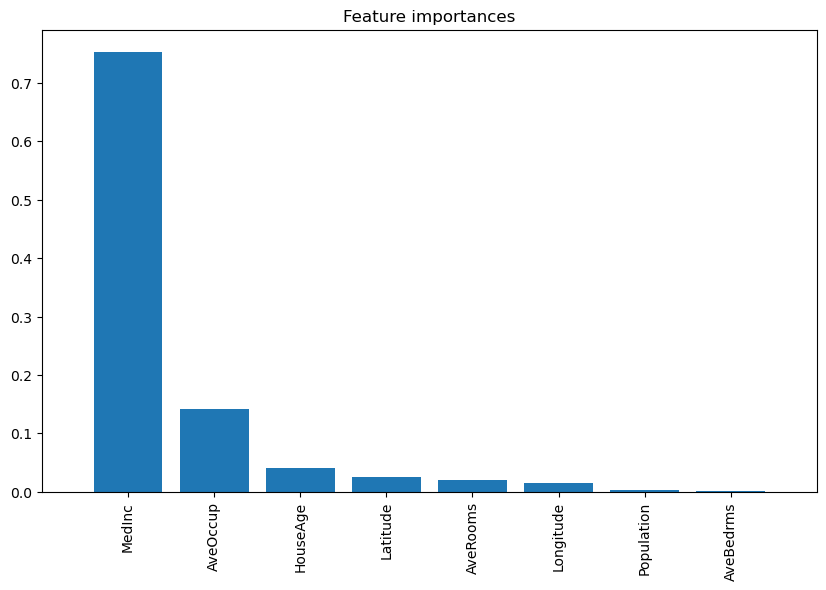

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()